- [Split](#Split)
- [Handling Missing Values](#Handling-Missing-Values)
- [Feature Encoding](#Feature-Encoding)
- [Feature Dropping](#Feature-Dropping)
- [Model Training](#Model-Training)

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


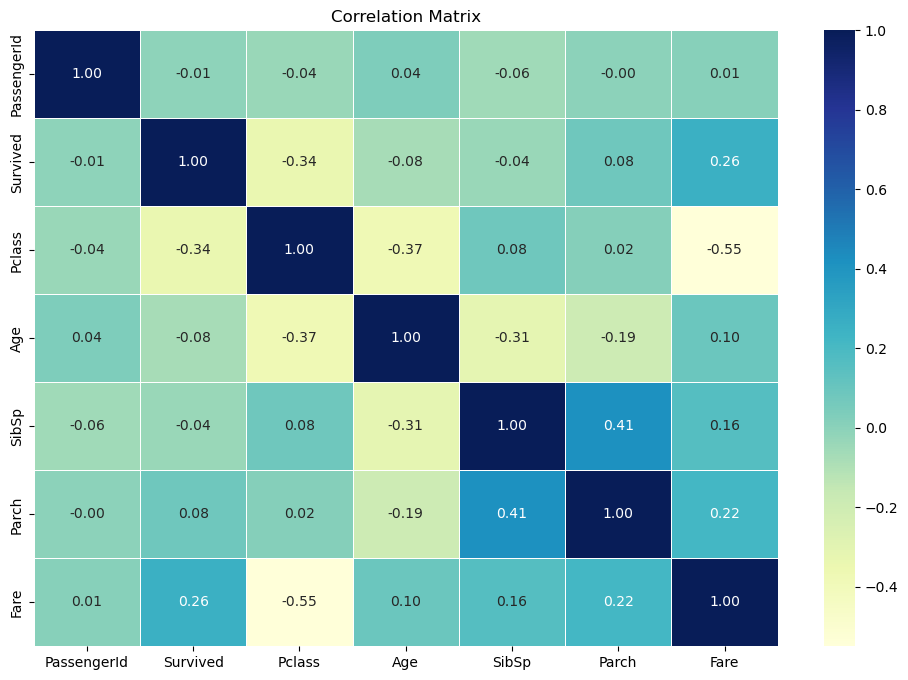

In [46]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Split

In [54]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indicies, test_indicies in split.split(df, df[['Survived', 'Pclass', 'Sex']]):
    train_set = df.loc[train_indicies]
    test_set = df.loc[test_indicies]

<Axes: >

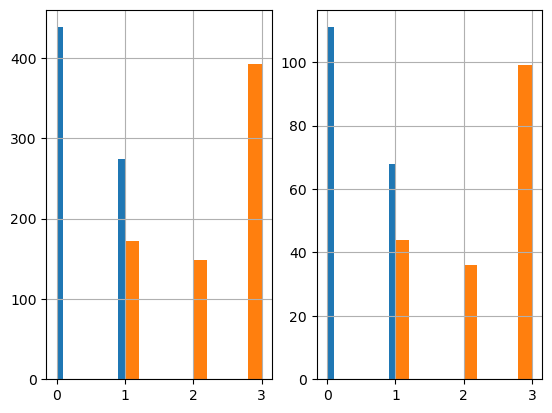

In [56]:
plt.subplot(1,2,1)
train_set['Survived'].hist()
train_set['Pclass'].hist()

plt.subplot(1,2,2)
test_set['Survived'].hist()
test_set['Pclass'].hist()

In [58]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Handling Missing Values
- Approximately 20% of entries in the 'age' feature were missing. These missing values were imputed using the mean of the non-missing values, which is a common strategy for numerical features.

In [64]:
class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")  # use the mean to fill missing values
        X['Age'] = imputer.fit_transform(X[['Age']])  # replace 'Age' column with filled values
        return X

## Feature Encoding
- The Embarked column had 4 unique categories, transformed into numerical form using one-hot encoding
- The Sex column had 2 unique categories, transformed into numerical form using one-hot encoding

In [66]:
class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        col_names = ['C', 'S', 'Q', 'N']

        for i in range(len(matrix.T)):
            X[col_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        col_names = ["male", "female"]
        
        for i in range(len(matrix.T)):
            X[col_names[i]] = matrix.T[i]
            
        return X

## Feature Dropping
- Dropping irrelevant features such as [ Name, Ticket ]
- Dropping 'Cabin' feature since 75% of its entries are missing.
- Dropping encoded features like [ Embarked, Sex ]
- Dropping 'N' feature to avoid redundancy in the dataset

In [68]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["Embarked", "Sex", "Name", "Ticket", "Cabin", "N"], axis=1, errors="ignore")

In [72]:
pipe = Pipeline([("ageimputer", AgeImputer()),
                ("featureencoder", FeatureEncoder()),
                ("featuredropper", FeatureDropper())])

In [74]:
train_set = pipe.fit_transform(train_set)

In [76]:
train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,male,female
867,868,0,1,31.0,0,0,50.4958,0.0,0.0,1.0,0.0,1.0
619,620,0,2,26.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
50,51,0,3,7.0,4,1,39.6875,0.0,0.0,1.0,0.0,1.0
286,287,1,3,30.0,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
834,835,0,3,18.0,0,0,8.3000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,0,3,50.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
518,519,1,2,36.0,1,0,26.0000,0.0,0.0,1.0,1.0,0.0
54,55,0,1,65.0,0,1,61.9792,1.0,0.0,0.0,0.0,1.0
603,604,0,3,44.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [78]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  male         712 non-null    float64
 11  female       712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [84]:
X = train_set.drop(['Survived'], axis=1)
Y = train_set['Survived']

scaler = StandardScaler()
x_data = scaler.fit_transform(X)
y_data = Y.to_numpy()

## Model Training

In [86]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [92]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=None, scoring='accuracy')
grid_rf.fit(x_data, y_data)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [94]:
print("\nBest Random Forest Params:", grid_rf.best_params_)


Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


In [96]:
test_set = pipe.fit_transform(test_set)

In [123]:
X = test_set.drop(['Survived'], axis=1)
Y = test_set['Survived']

scaler = StandardScaler()
X_test = scaler.fit_transform(X)
y_test = Y.to_numpy()

In [125]:
preds = grid_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.8268156424581006
